In [1]:
import numpy as np  # type: ignore
import random  # type: ignore
import matplotlib.pyplot as plt  # type: ignore

##### Global parameters of the system: 

In [2]:
A = 300  # Atomic weight of targilium
N_avogadro = 0.6e24
sigma = 10e-24

max_students = 10000
max_experiments = 100

---

In [3]:
class Student:
    def __init__(self, x=0, y=0, z=0) -> None:
        self.x = x
        self.y = y
        self.z = z
        self.dx = 0
        self.dy = 0
        self.dz = 0

    def set_direction(self):
        while True:
            x = random.uniform(-1, 1)
            y = random.uniform(-1, 1)
            z = random.uniform(-1, 1)

            if np.sqrt(x**2 + y**2 + z**2) > 1:
                magnitude = np.sqrt(x**2 + y**2 + z**2)
                self.dx = x / magnitude
                self.dy = y / magnitude
                self.dz = z / magnitude
                break
        return np.array([self.dx, self.dy, self.dz])

    def set_distance(self, rho):
        rho0 = (N_avogadro * rho)/A
        l_bar = 1/(rho0 * sigma)
        dist = -l_bar * np.log(1 - random.uniform(0, 1))
        return dist

    def move(self, rho):
        direction = self.set_direction()
        distance = self.set_distance(rho)
        self.x += direction[0] * distance
        self.y += direction[1] * distance
        self.z += direction[2] * distance
        return (self.x, self.y, self.z)

    def interaction(self, radius, p0, p1):
        if np.sqrt(self.x**2 + self.y**2 + self.z ** 2) > radius:
            return 0
        else:
            p = random.random()
            if (p < p0):
                return 0
            elif (p < p0+p1):
                return 1
            else:
                return 2

Function for calculating the result of one experiment: 

In [4]:
def experiment(radius, rho, p0, p1):
    students = []
    s = Student()
    students.append(s)
    s.set_direction()
    while True:
        if (len(students) >= 10000):
            return 1
        if (len(students) <= 0):
            return 0
        st = students[0]
        x_orig, y_orig, z_orig = st.move(rho)
        int_result = st.interaction(radius, p0, p1)
        if (int_result == 0):
            students.pop(0)
        elif (int_result == 1):
            st.set_direction()
        elif (int_result == 2):
            students.pop(0)
            st1 = Student(x_orig, y_orig, z_orig)
            st1.set_direction()
            students.append(st1)
            st2 = Student(x_orig, y_orig, z_orig)
            st2.set_direction()
            students.append(st2)

Function for checking 100 experiments:

In [5]:
def check_criticality(radius, rho, p0, p1):
    for _ in range(100):
        res = experiment(radius, rho, p0, p1)
        if (res == 1):
            return 1
    return 0

Main function, calculating the radius using the given algorithm: 

In [6]:
def calculate_radius(rho, p0, p1, print_flag, radius=5):
    i = 0
    while True:
        i += 1
        state1 = check_criticality(radius, rho, p0, p1)
        if state1 == 1:
            radius *= 0.9
        else:
            radius *= 1.1
        r_prev = radius
        state2 = check_criticality(radius, rho, p0, p1)
        if state2 == 1:
            radius *= 0.9
        else:
            radius *= 1.1
        r_next = radius
        if state1 != state2:
            res_r = (r_prev + r_next)/2
            mass = rho * (4/3) * np.pi * res_r**3
            if print_flag:
                print(
                    f"The critical radius: R={res_r:.3f} [cm] with mass: m={mass:.3f} [g]; converged within {i} iterations.")
            return mass

---

### Remark:
You can see that below I used some values as the initial radius - I got them after calculating with static initial radius (10) for a long time (runtimes of up to 10 minutes), and for code to converge faster (and to run faster) I provided them as inputs. So these are not random but pre-calculated numerically. Also, because of this the iterations counter will be off (it will show 1 in most cases although some of them were calculated in up to 6-7 iterations).

---

### Part 1

In [7]:
rho = 30  # Density in g/cm^3
p0 = 0.2  # Probability of ingestion
p1 = 0.5  # Probability of dispersion
p2 = 0.3  # Probability of fission

calculate_radius(rho, p0, p1, 1, 8)

The critical radius: R=8.360 [cm] with mass: m=73422.420 [g]; converged within 1 iterations.


73422.42027162692

---

### Part 2: 

Values: 

In [8]:
rho_array = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Density in g/cm^3
initial_radiuses = [24, 12, 8, 6, 4, 4, 3.5, 3, 3, 2.5]
mass_array = np.zeros_like(rho_array)
p0 = 0.2  # Probability of ingestion
p1 = 0.5  # Probability of dispersion
p2 = 0.3  # Probability of fission

for i, rho in enumerate(rho_array):
    print(f"Rho = {rho} [g/cm^3]:")
    mass_array[i] = calculate_radius(rho, p0, p1, 1, initial_radiuses[i])

Rho = 10 [g/cm^3]:
The critical radius: R=25.080 [cm] with mass: m=660801.782 [g]; converged within 1 iterations.
Rho = 20 [g/cm^3]:
The critical radius: R=12.540 [cm] with mass: m=165200.446 [g]; converged within 1 iterations.
Rho = 30 [g/cm^3]:
The critical radius: R=8.360 [cm] with mass: m=73422.420 [g]; converged within 1 iterations.
Rho = 40 [g/cm^3]:
The critical radius: R=6.270 [cm] with mass: m=41300.111 [g]; converged within 1 iterations.
Rho = 50 [g/cm^3]:
The critical radius: R=5.058 [cm] with mass: m=27098.395 [g]; converged within 2 iterations.
Rho = 60 [g/cm^3]:
The critical radius: R=4.180 [cm] with mass: m=18355.605 [g]; converged within 1 iterations.
Rho = 70 [g/cm^3]:
The critical radius: R=3.308 [cm] with mass: m=10609.287 [g]; converged within 1 iterations.
Rho = 80 [g/cm^3]:
The critical radius: R=3.135 [cm] with mass: m=10325.028 [g]; converged within 1 iterations.
Rho = 90 [g/cm^3]:
The critical radius: R=2.835 [cm] with mass: m=8589.944 [g]; converged within 1 i

Plot:

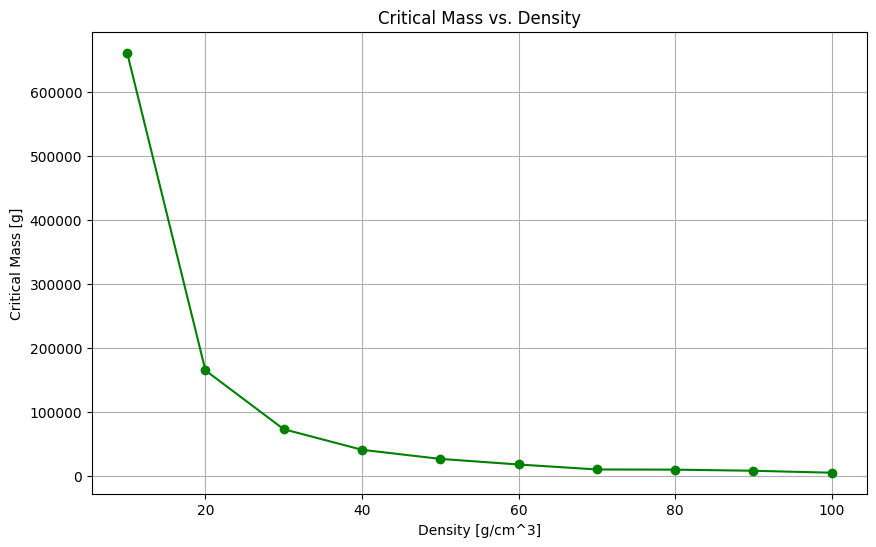

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(rho_array, mass_array,
         marker='o', linestyle='-', color='g')
plt.title('Critical Mass vs. Density')
plt.xlabel('Density [g/cm^3]')
plt.ylabel('Critical Mass [g]')
plt.grid(True)

plt.show()

---

### Part 3: 

Values: 

In [10]:
rho = 30  # Density in g/cm^3
p0_array = [0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
            0.2, 0.2, 0.3, 0.3, 0.3]  # Probability of ingestion
p1_array = [0.75, 0.7, 0.65, 0.57, 0.55, 0.53, 0.51, 0.5, 0.49,
            0.47, 0.45, 0.35, 0.30, 0.25]  # Probability of dispersion
p2_array = [0.15, 0.20, 0.25, 0.23, 0.25, 0.27, 0.29, 0.3, 0.31,
            0.33, 0.35, 0.35, 0.4, 0.45]  # Probability of fission
mass_array = np.zeros_like(p0_array)
initial_radiuses = [12, 8, 6, 16, 12, 10, 8, 8, 7, 7, 6, 12, 8, 6]

for i, _ in enumerate(p0_array):
    print(f"p0={p0_array[i]}, p1 = {p1_array[i]}, p2 = {p2_array[i]}:")
    mass_array[i] = calculate_radius(rho, p0_array[i], p1_array[i], 1, initial_radiuses[i])

p0=0.1, p1 = 0.75, p2 = 0.15:
The critical radius: R=12.540 [cm] with mass: m=247800.668 [g]; converged within 1 iterations.
p0=0.1, p1 = 0.7, p2 = 0.2:
The critical radius: R=8.360 [cm] with mass: m=73422.420 [g]; converged within 1 iterations.
p0=0.1, p1 = 0.65, p2 = 0.25:
The critical radius: R=6.270 [cm] with mass: m=30975.084 [g]; converged within 1 iterations.
p0=0.2, p1 = 0.57, p2 = 0.23:
The critical radius: R=16.720 [cm] with mass: m=587379.362 [g]; converged within 1 iterations.
p0=0.2, p1 = 0.55, p2 = 0.25:
The critical radius: R=12.540 [cm] with mass: m=247800.668 [g]; converged within 1 iterations.
p0=0.2, p1 = 0.53, p2 = 0.27:
The critical radius: R=10.450 [cm] with mass: m=143403.165 [g]; converged within 1 iterations.
p0=0.2, p1 = 0.51, p2 = 0.29:
The critical radius: R=9.148 [cm] with mass: m=96190.318 [g]; converged within 2 iterations.
p0=0.2, p1 = 0.5, p2 = 0.3:
The critical radius: R=8.360 [cm] with mass: m=73422.420 [g]; converged within 1 iterations.
p0=0.2, p1 =

We can see that the masses are equal for some values of $p0$, $p1$, $p2$. Lets look at the meaning of each probability. $p0$ is the probability to lose particle and $p0$ - is the probability to gain new one. So, actually, being in the $p1$ range does not change the critical mass - because the amount of particles does not change, this only prolongates the system state for one more step, where, again, there are 3 probabilities. 

Lets propose the following parameter: $0*p_0 + 1*p_1 + 2*p_2$. This is the total particle gain - each of the probabilities multiplied by number of particles corresponding to it. As this value decreases, the critical mass increases. We can see that the mass goes like $r^3$ and radius is changed according to the state. The more under-critical states we had - the bigger the radius will be (multiplication by 1.1) and so the bigger the mass will be. Lets plot the parameter: 

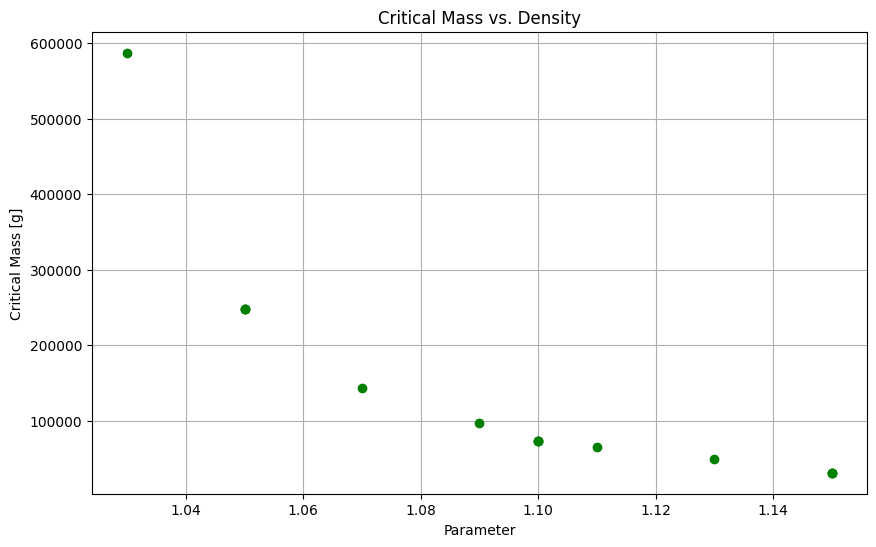

In [11]:
param_array = np.zeros_like(p0_array)
for i in range(len(p0_array)):
    param_array[i] = 0*p0_array[i] + 1*p1_array[i] + 2*p2_array[i]

plt.figure(figsize=(10, 6))
plt.plot(param_array, mass_array,
         marker='o', linestyle=' ', color='g')
plt.title('Critical Mass vs. Density')
plt.xlabel('Parameter')
plt.ylabel('Critical Mass [g]')
plt.grid(True)
plt.show()

In [12]:
rho = 30  # Density in g/cm^3
p0_array = [0.1, 0.27, 0.31]  # Probability of ingestion
p1_array = [0.7, 0.36, 0.28]  # Probability of dispersion
p2_array = [0.2, 0.37, 0.41]  # Probability of fission
mass_array = np.zeros_like(p0_array)
for i in range(len(p0_array)):
    param_array[i] = 0*p0_array[i] + 1*p1_array[i] + 2*p2_array[i]

for i, _ in enumerate(p0_array):
    print(
        f"p0={p0_array[i]}, p1 = {p1_array[i]}, p2 = {p2_array[i]}, parameter = {param_array[i]:.1f}:")
    mass_array[i] = calculate_radius(rho, p0_array[i], p1_array[i], 1)

p0=0.1, p1 = 0.7, p2 = 0.2, parameter = 1.1:
The critical radius: R=8.371 [cm] with mass: m=73702.740 [g]; converged within 4 iterations.
p0=0.27, p1 = 0.36, p2 = 0.37, parameter = 1.1:
The critical radius: R=8.371 [cm] with mass: m=73702.740 [g]; converged within 4 iterations.
p0=0.31, p1 = 0.28, p2 = 0.41, parameter = 1.1:
The critical radius: R=8.371 [cm] with mass: m=73702.740 [g]; converged within 4 iterations.


We can see that for the same value of the parameter but different values of $p0$, $p1$ and $p2$ we get the same critical mass, as requested.